# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [ ]:
%matplotlib inline

#imports
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt


#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [ ]:
points = pd.read_csv("/content/session_1_ML_data_Linear_regression.csv")

points

,study_Hours,Test_scores
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


In [ ]:
#Extract columns
x = points['study_Hours']
y = points['Test_scores']

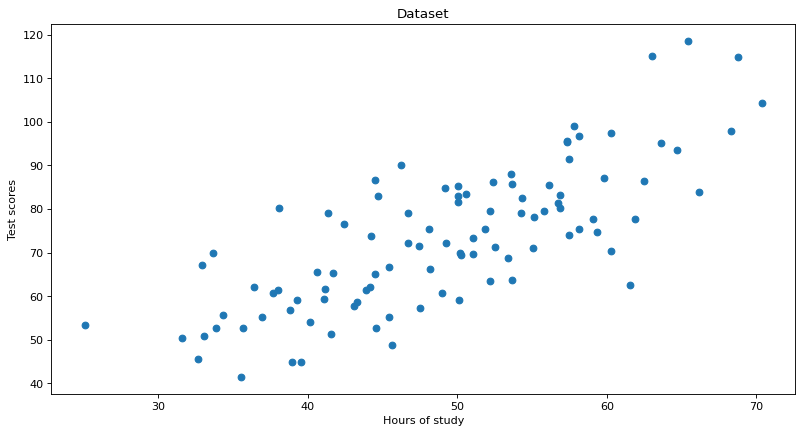

In [ ]:
#Plot the dataset
plt.figure(figsize=(12, 6), dpi=80)

plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')

plt.show( )


#### Define cost function

In [ ]:
def compute_cost_fun(a_0, a_1, points):
    total_cost = 0
    N = float(len(points))

    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points['study_Hours'][i]
        y = points['Test_scores'][i]
        total_cost += (y - (a_1 * x + a_0)) ** 2   #MSE

    #Return average of squared error
    return total_cost/N


#         total_cost += (y - (m * x + b)) ** 2   #MSE


#### Define Gradient Descent functions

In [ ]:
def step_gradient(a_0_current, a_1_current, points, learning_rate):
    a_1_gradient = 0
    a_0_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        a_1_gradient += - (2/N) * x * (y - (a_1_current * x + a_0_current))
        a_0_gradient += - (2/N) * (y - (a_1_current * x + a_0_current))

    #Update current a_1 and a_0
    a_1_updated = a_1_current - learning_rate * a_1_gradient
    a_0_updated = a_0_current - learning_rate * a_0_gradient

    #Return updated paraa_1eters
    return a_0_updated, a_1_updated


def gradient_descent_runner(points, starting_a_0, starting_a_1, learning_rate, num_iterations):
    a_0 = starting_a_0
    a_1 = starting_a_1
    cost_graph = []

    global a_0_values,a_1_values
    a_0_values,a_1_values=[],[]

    #For every iteration, optimize a_0, a_1 and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost_fun(a_0, a_1, points))
        a_0, a_1 = step_gradient(a_0, a_1, np.array(points), learning_rate)

        a_0_values.append(a_0)
        a_1_values.append(a_1)

    return [a_0, a_1, cost_graph]
# np.array(points)

#### Defining the hyperparamters

In [ ]:
#hyperparamters
learning_rate = 0.0001
initial_a_0 = 0
initial_a_1 = 0
num_iterations = 10

#### Run gradient_descent_runner() to get optia_1ized parameters a_0 and a_1

In [ ]:
a_0, a_1, cost_graph = gradient_descent_runner(points, initial_a_0, initial_a_1, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized a_0:', a_0)
print ('Optimized a_1:', a_1)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost_fun(a_0, a_1, points))

Optimized a_0: 0.02973927502614487
Optimized a_1: 1.4796456270098886
Minimized cost: 111.06788810058573


#### Plotting the cost per iterations

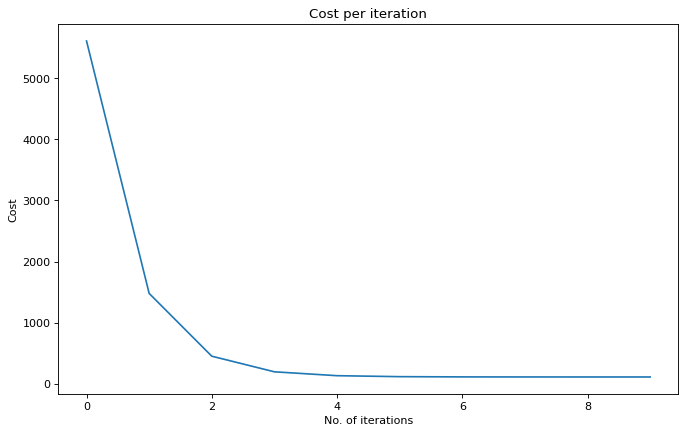

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

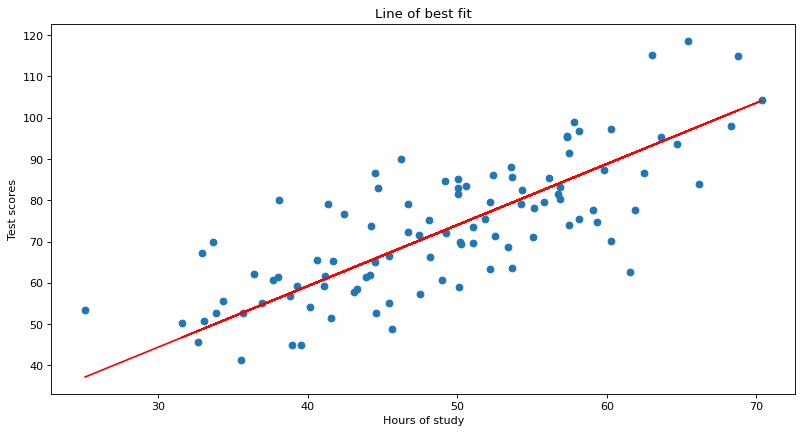

In [ ]:
#Plot dataset
plt.figure(figsize=(12, 6), dpi=80)

plt.scatter(x, y)
#Predict y values
pred = a_1 * x + a_0
#Plot predictions as line of best fit
# plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

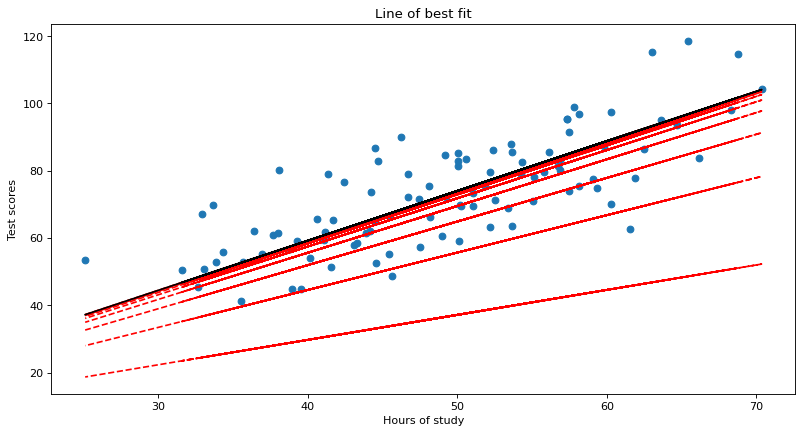

In [ ]:
#Plot dataset
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x, y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

for w,b in zip(a_0_values,a_1_values):
    pred = b*x + w
    plt.plot(x,pred,c="r",linestyle="dashed")

y_pred = a_1 * x + a_0
plt.plot(x,y_pred,c="black")
plt.title('Line of best fit')
plt.show()